In [11]:
#import all libraries
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nabeel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nabeel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nabeel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

•	<b>Q1 Briefly discuss your selection and application of a programming tool you have used to complete this task, with reference to alternative approaches and justification for why these were not chosen.</b>

We selected dialogues text datasets to perform the classification of dialogues. Since this task is based on natural language processing, we used the nltk library of Python. It provides all the available options for data pre-processing. We have other options like spacy and genism but the functionality provided by nltk was much simpler and fulfilled all of our requirements.
We first read the dialogue and their topics (labels) from their respective files. The following pre-processing steps were applied to our dialogues.
1.	<b>Tokenization:</b>
The first and most basic step was tokenization, we used nltk word tokenizer to convert dialogues to a list of words.
2.	<b>Removing Extra tokens:</b>
Since token “__eou__” represented end of the dialogue of a party, this token was a recurrent token and was needed so we removed it
3.	<b>Removing Stop words:</b>
Stop words are also not meaningful and do not relay contribute to show similarity or difference between two documents so we removed them as well. We used English stop words from nltk to remove all the stop words from out tokens.
4.	<b>Removing numeric tokens:</b>
Numeric tokens are also not really meaningful, so we removed them as well and kept only string tokens.
5.	<b>Lemmatization:</b>
Lemmatization is an important pre-processing step in nltk. We do not want to treat different forms of same words as different words. So we used WordNetLemmatizer from nltk to lemmatize our tokens.
6.	<b>Check on the length of tokens:</b>
Any word with a length less than or equal to 2 is not considered as a really meaningful word. So, we remove all tokens with length <=2

<b>Tfidf conversion:</b>

Once data is tokenized and pre-processed, now before applying any machine learning algorithm we must convert it into samples with features. We have dialogues represented by tokens, but we do not have proper input for the machine learning algorithm yet. 
To convert our tokens to the proper input, we converted these tokens to tfidf values. After our conversion, each document is represented by unique tokens in our vocabulary as feature labels. We now have an array of values where cell (I,j) represents the tfidf value of token j and document I.
We have other alternatives like Bag of words (Bow) conversion but tfidf not only considers the occurrence of the term in the doc but it also assign importance to token based on its rarity in the vocabulary. If a term is present is most documents, it will be less important and less decisive.


In [2]:
stopwords = stopwords.words('english')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
lemmatizer = WordNetLemmatizer()
def tokenize1(content):
    tok=word_tokenize(content)
    tok= [token.lower() for token in tok ]
    tok= [token for token in tok  if token!='__eou__']
    tok = [token for token in tok if token not in stopwords]
    tok= [token for token in tok if token.isalpha()]
    tok = [lemmatizer.lemmatize(token) for token in tok]
    tok= [token for token in tok if len(token)>=3 ]
    return tok
def loadDialogues(fname):
    f=open(fname,'r',encoding='utf-8')
    dialogues=f.readlines()
    return dialogues
def loadLabels(fname):
    f=open(fname,'r',encoding='utf-8')
    lines=f.readlines()
    labels=[int(l) for l in lines]
    return labels
       
dialogues=loadDialogues("dialogues_text.txt")
topics=np.array(loadLabels("dialogues_topic.txt"))
topics=topics-1
tfidf = TfidfVectorizer(tokenizer=tokenize1)
diag_arr= np.array(tfidf.fit_transform(dialogues).todense())


In [3]:
#train test split 
train_data, test_data, train_labels, test_labels = train_test_split(diag_arr, topics, test_size = 0.1, random_state = 42,stratify=topics)
#train_data,validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size = 0.1, random_state = 42,stratify=train_labels)



•	<b>Q2 Compare and contrast an alternative solution to the one you have chosen, including the potential advantages and disadvantages of each.</b> 
Since our problem was a classification problem, we have many classifiers in machine learning that could help us to achieve our goal. But we have to choose the optimal options based on our dataset. We chose the Stochastic Gradient Descent (SGD) classifier to perform the classification process.
The reason we chose the SGD classifier is that it is a relatively simple but very effective classifier. It is the most suitable classifier for sparse datasets. Since problems based on natural language processing are usually sparse and, in our case, tfidf representation of documents in specifically sparse. This was the most suitable model for our dataset and problem.

Since the size of the input array in NLP problems become really large with an increase in the number of documents. Any additional document/dialogue will add many words to the vocabulary and will result in an increase in the number of features.  We need a classifier that is efficient and scalable with a growing feature size. 

 The stochastic Gradient Descent (SGD) classifier is an efficient classifier which makes it more suitable for NLP tasks. It also has early stopping criteria which can be used to stop the process when convergence is achieved.
 We had other options like tree-based classifiers ( Decision tree classifier, random forest), probabilistic classifiers (naïve Bayes), Kernal-based classifiers (SVM), and distance-based classifiers like KNN.
 
Distance-based classifiers are more suitable for categorical features. Our features are numerical which makes them less suitable for our dataset. They also work well with numerical features in many cases but since our data is sparse with a lot of features, tree-based classifiers do not seem really suitable for our task.

KNN is a distance-based classifier that usually works on Euclidean distance.  In our case presence or absence of a term is more important that the number of occurrences of the term in a dialogue. So, it is not really suitable until a very good distance measure is used for NLP tasks. It still tends to perform much worse than SGD.

SVM can be a good selection to perform this task but it might overfit when no of features becomes greater than no. of samples. Still, it is a good selection for our task but not better than SGD.

Naïve Bayes is also a good candidate as it works well with NLP tasks. But it assumes that all of the features are independent which is not true if we apply techniques like POS tagging etc. in our NLP solution. So to make our solution more scalable we need a better classifier.



<b> Paramter Tunning </b>

Paremter tunning is perfromed using gridsearchcv. Gridsearchcv try all possible combinations of a model and retutrn the 
set of parametrs with best results

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
params={'loss': ('hinge', 'log_loss'), 'alpha': (0.001, 0.0001,0.00001),
                         'penalty':('l2', 'l1')
                        }
clf =SGDClassifier(loss='hinge',alpha=0.0001,penalty='l2', random_state=42 )
#clf = GridSearchCV(SGDClassifier(random_state=42), params)
clf.fit(train_data, train_labels)
pred=clf.predict(test_data)


accuracy of SGD 0.7362804878048781


<b>Model Evaluation<b>
Multiple criteras are used for model evaluation.
<b>Accuracy</b>

It is ratio of correctly classified samples and total samples

<b>Precison</b>
It is the ability of a classifier not to misclassify positive class.

tp / (tp + fp)

<b>Recall</b>
It is the ability of a classifier to correctly classify positive samples.

tp / (tp + fn) 

<b>Area under curve</b>

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes.

<b>Confusion matrix</b>

Confusion matrix is a table to true an predicted labels. Its shows that what are the actual labels of samples and what are 
the predicted labels.

Since our data is multi class data, we use macro averging to compute evaluation metrices. In macro averging overall performance 
is computed insted of focusing on individual class.

accuracy of SGD 0.7362804878048781
Precision of SGD 0.7467378333497384
Recall of SGD 0.5861089746676129


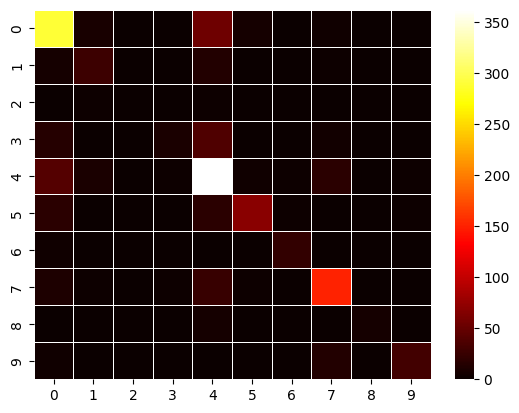

In [14]:
#Model Evaluation
accuracy=accuracy_score(test_labels,pred)
print("accuracy of SGD",accuracy )
precision=precision_score(test_labels,pred,average='macro')
print("Precision of SGD",precision )
recall=recall_score(test_labels,pred,average='macro')
print("Recall of SGD",recall )
conf_mat=confusion_matrix(test_labels,pred)
ax = sns.heatmap(conf_mat, linewidth=0.5, cmap='hot')
plt.show()


•	<b>Q3 Select a legal and/or ethical issue that is either directly associated with your solution or relevant to similar problems. Briefly discuss how this issue can be addressed, either in terms of your solution, or other practices within the field.</b>
If we observe closely our dataset there are some dialogues that contain discussion about illegal substances like weed etc. Similarly, there might be an offensive discussion between two individuals. Since NLP has a vast variety of problems and solutions, this can be a real legal or ethical issue.

If we are designing any chatbot trained on these dialogues or similar to these dialogues, we need to be very careful to take care of illegal activity, and words that spread hatred, racism, violence, sexism, and other issues like this. 
Since we are dealing with artificial intelligence, we need to be really careful about these issues. Even if some substances like alcohol is appropriate for certain age group but it is not appropriate for the underage individual.

These issues are not easy to solve, we need multiple precautionary measures to avoid them. We need to apply preprocessing techniques that reduce the amount of inappropriate data fed to our model. Then we need to check our machine-learning models for inappropriate responses.

If we talk about our case specifically, we are dealing with a classification problem. We cannot classify a dialogue that is discussing lawn weeds with weed (drug) in the same category. In simple words, we cannot say that in both scenarios they are discussing the same topic. So we need more sophisticated techniques to identify the topic of discussion and instead of considering only words or tokens we also need to observe and evaluate the context of the discussion.


